In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST Original')

In [2]:
X,y = mnist['data'], mnist['target']

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=0.95)

In [44]:
X_transformed=pca.fit_transform(X)

In [45]:
X_transformed.shape

(70000, 154)

In [46]:
X_recovered = pca.inverse_transform(X_transformed)

In [47]:
X_recovered.shape

(70000, 784)

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

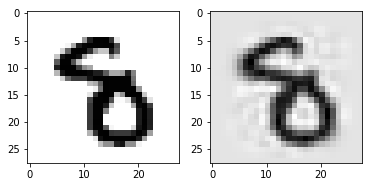

In [49]:
plt.subplot(121)
imshow(X[50000].reshape(28,28), cmap = plt.cm.binary )
plt.subplot(122)
imshow(X_recovered[50000].reshape(28,28), cmap = plt.cm.binary )

In [51]:
from sklearn.decomposition import IncrementalPCA
n_batches =100
inc_pca=IncrementalPCA(n_components=154)

for batch in np.array_split(X,n_batches):
    inc_pca.fit(X)
    
X_reduced = inc_pca.transform(X)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
forest_clf = RandomForestClassifier()



In [54]:
X_train , X_test, y_train, y_test = train_test_split(X,y)

In [62]:
import time
start = time.time()
forest_clf.fit(X_train,y_train)
end = time.time()
print(end-start)

4.013290882110596


In [63]:
X_train_reduced = pca.fit_transform(X_train)

In [64]:
start = time.time()
forest_clf.fit(X_train_reduced, y_train)
end = time.time()
print(end-start)

8.55036211013794


In [67]:
forest_clf.fit(X_train,y_train)
forest_clf.score(X_test,y_test)

0.9449142857142857

In [70]:
pca.fit(X)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
forest_clf.fit(X_train_reduced,y_train)
forest_clf.score(X_test_reduced, y_test)

0.8898857142857143

In [3]:
from sklearn.manifold import TSNE

In [73]:
from pprint import pprint
pprint(TSNE.__doc__)

('t-distributed Stochastic Neighbor Embedding.\n'
 '\n'
 '    t-SNE [1] is a tool to visualize high-dimensional data. It converts\n'
 '    similarities between data points to joint probabilities and tries\n'
 '    to minimize the Kullback-Leibler divergence between the joint\n'
 '    probabilities of the low-dimensional embedding and the\n'
 '    high-dimensional data. t-SNE has a cost function that is not convex,\n'
 '    i.e. with different initializations we can get different results.\n'
 '\n'
 '    It is highly recommended to use another dimensionality reduction\n'
 '    method (e.g. PCA for dense data or TruncatedSVD for sparse data)\n'
 '    to reduce the number of dimensions to a reasonable amount (e.g. 50)\n'
 '    if the number of features is very high. This will suppress some\n'
 '    noise and speed up the computation of pairwise distances between\n'
 "    samples. For more tips see Laurens van der Maaten's FAQ [2].\n"
 '\n'
 '    Read more in the :ref:`User Guide <t_sne>`.\

In [76]:
X.shape

(70000, 784)

In [4]:
tsne = TSNE()

In [17]:
import time
start = time.time() 
X_tsne_reduced = tsne.fit_transform(X[:1000])
end = time.time()
print(end-start)

23.180887937545776


In [24]:
import numpy as np
data = np.array([[10 , 0.22499513626098633],
[33 , 0.42253732681274414],
[100, 1.6129119396209717],
[300, 5.6064369678497314],
[500, 10.480701208114624],
[1000, 23.180887937545776]])

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X , y = data[:,0], data[:,1]

In [28]:
X,y

(array([  10.,   33.,  100.,  300.,  500., 1000.]),
 array([ 0.22499514,  0.42253733,  1.61291194,  5.60643697, 10.48070121,
        23.18088794]))

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
sgd_reg = LinearRegression()

In [48]:
sgd_reg.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
sgd_reg.predict(X)

array([-0.39533784,  0.14088703,  1.70293342,  6.36575844, 11.02858346,
       22.68564601])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=10000)

In [5]:
from sklearn.manifold import TSNE
tsne=TSNE()

In [6]:
X_val_reduced = tsne.fit_transform(X_val)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def plotmnist(X,y):
    for i in range(10):
        y_new = (y==i)
        mx = X[y_new,0]
        nx = X[y_new,1]
        plt.scatter(mx, nx)
        
    plt.legend()


No handles with labels found to put in legend.


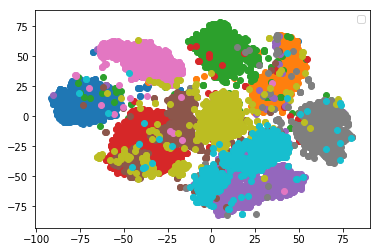

In [24]:
plotmnist(X_val_reduced,y_val)

In [15]:
y_new = (y_val==0)
X_val_reduced[y_new,0]

array([-78.55001 , -70.993   , -80.412926, ..., -59.169773, -81.03369 ,
       -70.02517 ], dtype=float32)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_val)

No handles with labels found to put in legend.


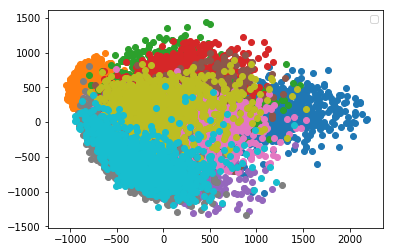

In [28]:
plotmnist(X_pca_reduced, y_val)

In [34]:
!conda update --all --y



Solving environment: done

## Package Plan ##

  environment location: /Users/Kunal/anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _ipyw_jlab_nb_ext_conf-0.1.0|           py36_0           4 KB
    alabaster-0.7.12           |           py36_0          17 KB
    anaconda-2020.02           |           py36_0          13 KB
    anaconda-client-1.7.2      |           py36_0         141 KB
    anaconda-navigator-1.9.12  |           py36_0         6.3 MB
    anaconda-project-0.8.4     |             py_0         215 KB
    applaunchservices-0.2.1    |             py_0           9 KB
    appscript-1.1.0            |   py36h1de35cc_0         271 KB
    argh-0.26.2                |           py36_0          36 KB
    asn1crypto-1.3.0           |           py36_0         162 KB
    astroid-2.3.3              |           py36_0         289 KB
    astropy-4.0                |   py36h1de3

  diff-match-patch   pkgs/main/noarch::diff-match-patch-20181111-py_0
  flake8             pkgs/main/osx-64::flake8-3.7.9-py36_0
  fsspec             pkgs/main/noarch::fsspec-0.6.2-py_0
  future             pkgs/main/osx-64::future-0.18.2-py36_0
  hypothesis         pkgs/main/noarch::hypothesis-5.5.4-py_0
  importlib_metadata pkgs/main/osx-64::importlib_metadata-1.5.0-py36_0
  intervaltree       pkgs/main/noarch::intervaltree-3.0.2-py_0
  joblib             pkgs/main/noarch::joblib-0.14.1-py_0
  json5              pkgs/main/noarch::json5-0.9.1-py_0
  jupyterlab_server  pkgs/main/noarch::jupyterlab_server-1.0.6-py_0
  keyring            pkgs/main/osx-64::keyring-21.1.0-py36_0
  krb5               pkgs/main/osx-64::krb5-1.17.1-hddcf347_0
  liblief            pkgs/main/osx-64::liblief-0.9.0-h2a1bed3_2
  libspatialindex    pkgs/main/osx-64::libspatialindex-1.9.3-h0a44026_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-4.0.1-hcfea43d_1
  matplotlib-base    pkgs/main/osx-64::matplotlib-

pywavelets-1.1.1     | 4.3 MB    | ##################################### | 100% 
bitarray-1.2.1       | 80 KB     | ##################################### | 100% 
appscript-1.1.0      | 271 KB    | ##################################### | 100% 
glob2-0.7            | 14 KB     | ##################################### | 100% 
sphinx-2.4.0         | 1.4 MB    | ##################################### | 100% 
numba-0.48.0         | 3.2 MB    | ##################################### | 100% 
heapdict-1.0.1       | 9 KB      | ##################################### | 100% 
libedit-3.1.20181209 | 159 KB    | ##################################### | 100% 
importlib_metadata-1 | 47 KB     | ##################################### | 100% 
mpc-1.1.0            | 90 KB     | ##################################### | 100% 
attrs-19.3.0         | 39 KB     | ##################################### | 100% 
curl-7.68.0          | 140 KB    | ##################################### | 100% 
scikit-image-0.16.2  | 24.2 

wheel-0.34.2         | 49 KB     | ##################################### | 100% 
requests-2.22.0      | 90 KB     | ##################################### | 100% 
expat-2.2.6          | 129 KB    | ##################################### | 100% 
sortedcollections-1. | 18 KB     | ##################################### | 100% 
pcre-8.43            | 227 KB    | ##################################### | 100% 
six-1.14.0           | 27 KB     | ##################################### | 100% 
colorama-0.4.3       | 20 KB     | ##################################### | 100% 
jupyter-1.0.0        | 6 KB      | ##################################### | 100% 
hdf5-1.10.4          | 4.5 MB    | ##################################### | 100% 
ipython_genutils-0.2 | 40 KB     | ##################################### | 100% 
ca-certificates-2020 | 132 KB    | ##################################### | 100% 
astropy-4.0          | 7.3 MB    | ##################################### | 100% 
pycurl-7.43.0.5      | 74 KB

jinja2-2.11.1        | 97 KB     | ##################################### | 100% 
jupyter_core-4.6.1   | 74 KB     | ##################################### | 100% 
xmltodict-0.12.0     | 14 KB     | ##################################### | 100% 
xlsxwriter-1.2.7     | 108 KB    | ##################################### | 100% 
python-dateutil-2.8. | 224 KB    | ##################################### | 100% 
krb5-1.17.1          | 1.2 MB    | ##################################### | 100% 
pytest-remotedata-0. | 14 KB     | ##################################### | 100% 
prompt_toolkit-3.0.3 | 236 KB    | ##################################### | 100% 
nbformat-5.0.4       | 102 KB    | ##################################### | 100% 
pytest-astropy-0.8.0 | 9 KB      | ##################################### | 100% 
pluggy-0.13.1        | 32 KB     | ##################################### | 100% 
ipywidgets-7.5.1     | 107 KB    | ##################################### | 100% 
sympy-1.5.1          | 10.3 

In [35]:
!pip3 install --upgrade tensorflow


  Using cached tensorflow-2.1.0-cp36-cp36m-macosx_10_11_x86_64.whl (120.8 MB)


In [36]:
import tensorflow
print(tensorflow.__version__)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Kunal/anaconda3/lib/python3.6/site-packages/tensorboar

2.1.0
